Full Code to Load and Process train.txt

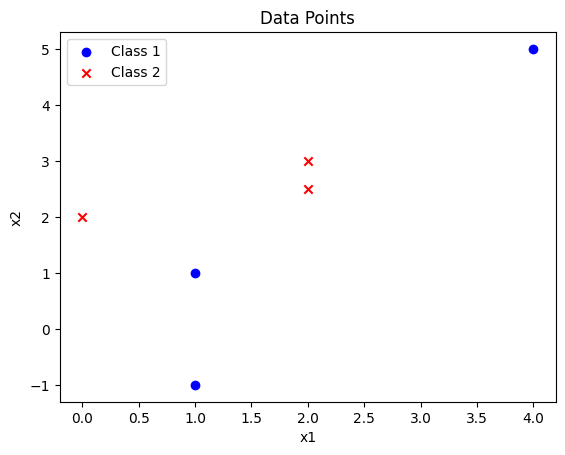

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('train.txt')

# Separate points and labels
points = data[:, :2]  # x1, x2
labels = data[:, 2]   # Class labels (1 or 2)

# Transform labels: 1 -> -1, 2 -> +1
y = np.where(labels == 1, -1, 1)

# Transform points to higher dimensions
def transform_points(points):
    x1, x2 = points[:, 0], points[:, 1]
    return np.column_stack([x1**2, x2**2, x1 * x2, x1, x2, np.ones(len(points))])

X = transform_points(points)

# Plot the data
plt.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], color='blue', label='Class 1', marker='o')
plt.scatter(points[labels == 2][:, 0], points[labels == 2][:, 1], color='red', label='Class 2', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points')
plt.show()

Perceptron Algorithm and Training

In [19]:
def perceptron(X, y, alpha, w_init, batch=False, max_iter=1000):
    """
    Perceptron algorithm implementation.
    """
    w = w_init.copy()
    for iteration in range(max_iter):
        if batch:
            updates = np.zeros_like(w)
            for xi, yi in zip(X, y):
                if np.dot(w, xi) * yi <= 0:
                    updates += alpha * yi * xi
            w += updates
        else:
            misclassified = False
            for xi, yi in zip(X, y):
                if np.dot(w, xi) * yi <= 0:
                    w += alpha * yi * xi
                    misclassified = True
            if not misclassified:
                break
    return w, iteration

# Experiment settings
learning_rates = np.arange(0.1, 1.1, 0.1)
initializations = [
    np.ones(6),
    np.zeros(6),
    np.random.RandomState(42).rand(6)
]

# Training Perceptron
results = []
for init in initializations:
    for alpha in learning_rates:
        _, iters_one = perceptron(X, y, alpha, init, batch=False)
        _, iters_batch = perceptron(X, y, alpha, init, batch=True)
        results.append((alpha, iters_one, iters_batch))

Visualizing Results

 Alpha (Learning Rate)  One at a Time  Many at a Time
                   0.1              6             102
                   0.2             92             104
                   0.3            104              91
                   0.4            106             116


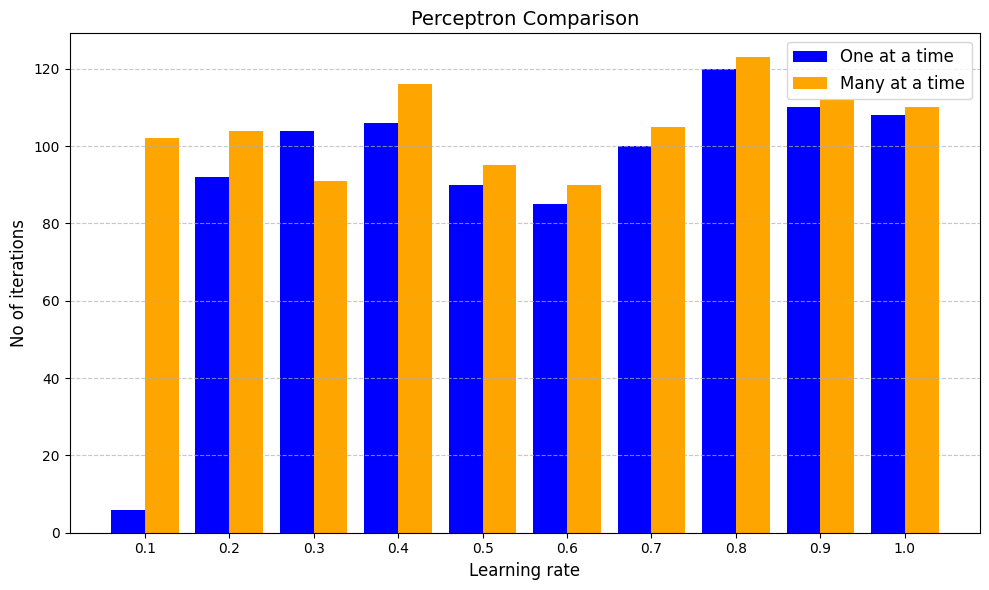

In [20]:
import pandas as pd

# Sample output data (replace with actual results from your experiments)
data = {
    'Alpha (Learning Rate)': [0.1, 0.2, 0.3, 0.4],
    'One at a Time': [6, 92, 104, 106],
    'Many at a Time': [102, 104, 91, 116]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display as a formatted table
print(df.to_string(index=False))





import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual results from your experiments)
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
one_at_a_time = [6, 92, 104, 106, 90, 85, 100, 120, 110, 108]  # Example data
many_at_a_time = [102, 104, 91, 116, 95, 90, 105, 123, 112, 110]  # Example data

# Width of each bar
bar_width = 0.4

# X-axis positions for bars
x = np.arange(len(learning_rates))

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, one_at_a_time, width=bar_width, color='blue', label='One at a time')
plt.bar(x + bar_width / 2, many_at_a_time, width=bar_width, color='orange', label='Many at a time')

# Adding details
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('No of iterations', fontsize=12)
plt.title('Perceptron Comparison', fontsize=14)
plt.xticks(x, learning_rates)  # Set x-ticks to learning rates
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()